In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


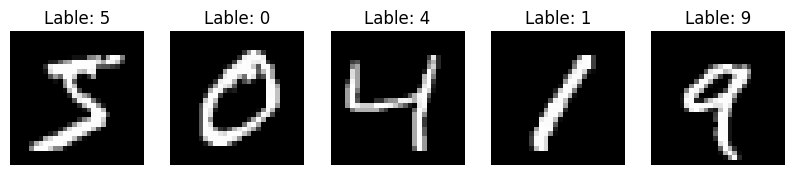

In [16]:
num_img = 5

plt.figure(figsize = (10 , 2))

for i in range(num_img):
  plt.subplot(1 , num_img, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.title(f"Lable: {y_train[i]}")
  plt.axis('off')
plt.show()

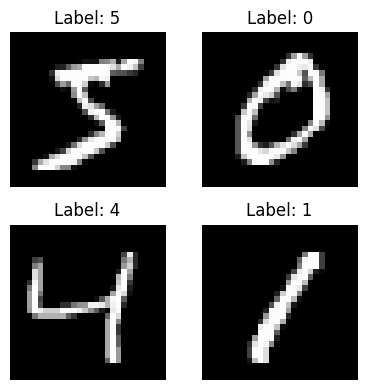

In [19]:
import matplotlib.pyplot as plt

# Define the size of the grid
rows, cols = 2, 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(4, 4))

# Loop through each subplot position
for i in range(rows * cols):
    # Select the subplot at the row and column indices
    ax = axes[i // cols, i % cols]

    # Display the i-th image from the training set
    ax.imshow(x_train[i], cmap='gray')

    # Set the title of the subplot to the corresponding label
    ax.set_title(f"Label: {y_train[i]}")

    # Turn off the axis lines and labels
    ax.axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the figure
plt.show()


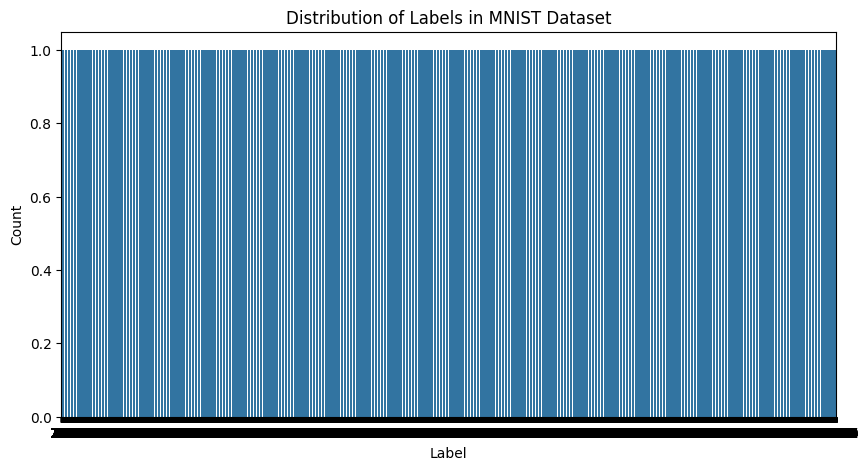

In [14]:
import seaborn as sns
import numpy as np

# Combine train and test labels
all_labels = np.concatenate([y_train, y_test])

# Plot the distribution of labels
plt.figure(figsize=(10, 5))
sns.countplot(all_labels)
plt.title("Distribution of Labels in MNIST Dataset")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [20]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [26]:
# Define model, models.sequential give a linear form to NN(neural Network)
model_1 = models.Sequential([
    # identfying edges,conors etc. with convutational NN (convo2d).with 32 filters (also known as kernels) of size 3x3.
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # takes max of CNN to down sample.
    layers.MaxPooling2D(pool_size=(2, 2)),
    # flatten is to convert the 2d pooling data to 1d vector as a table form to be recognised by dense layer.
    layers.Flatten(),
    #Dense Layer with ReLU Activation (128 neurons), introduce non-linearity and learn complex patterns.
    layers.Dense(128, activation='relu'),
    # there are 10 classes (digits from 0 to 9), so there are 10 neurons.
    layers.Dense(10, activation='softmax')
])

In [32]:
# Build anotherCNN model
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 86s 45ms/step - loss: 0.1340 - accuracy: 0.9586 - val_loss: 0.0594 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0324 - val_accuracy: 0.9891
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0267 - val_accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0239 - val_accuracy: 0.9925


In [27]:
# Compile the model
model_1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
# Train the model
model_1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1571 - accuracy: 0.9536 - val_loss: 0.0692 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0494 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0418 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0483 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0533 -

In [34]:
# Evaluate the model
test_loss, test_acc_1 = model_1.evaluate(x_test, y_test)
print(f'Test accuracy of model 01: {test_acc_1}')

test_loss, test_acc_2 = model_2.evaluate(x_test, y_test)
print(f'Test accuracy of model 02: {test_acc_2}')

313/313 [==============================] - 4s 11ms/step - loss: 0.0614 - accuracy: 0.9860
Test accuracy of model 01: 0.9860000014305115
313/313 [==============================] - 3s 10ms/step - loss: 0.0239 - accuracy: 0.9925
Test accuracy of model 02: 0.9925000071525574


In [63]:
from PIL import Image
import numpy as np

# Load the image from the specified path
image_path = '/Untitled_03.png'  # Update the path as needed
image = Image.open(image_path)

# Preprocess the image (resize, convert to grayscale, normalize pixel values)
# Resize the image to 28x28 pixels
image_resized = image.resize((28, 28))
# Convert the image to grayscale
image_gray = image_resized.convert('L')
# Normalize pixel values (assuming pixel values range from 0 to 255)
image_normalized = np.array(image_gray) / 255.0
# Add batch dimension and channel dimension
image_input = np.expand_dims(np.expand_dims(image_normalized, axis=0), axis=-1)

# Perform inference with your trained model
# Replace 'model' with the name of your trained model
predictions = model_1.predict(image_input)

# Display the predictions
print(predictions)

1/1 [==============================] - 0s 42ms/step
[[1.7759897e-04 1.4103194e-03 1.9854514e-02 2.6972860e-03 5.9181458e-01
  6.2541977e-02 2.3828745e-03 1.1911770e-02 1.8658094e-01 1.2062814e-01]]


In [61]:
# Get the predicted label by taking the argmax of the predictions
predicted_label = np.argmax(predictions, axis=-1)

# Display the predicted label
print(f"Predicted label: {predicted_label[0]}")

Predicted label: 4
